# **Last Name:** Azad 		**First Name:** Md Shawmoon 	**ID:** 2931823 (Individual Project)

## **Project Title:** Parameter-Efficient CQNN: A Hybrid Knowledge Distillation Approach from Classical CNN to QNN

# **Description:**
Quantum Machine Learning (QML) combines the principles of quantum mechanics with machine learning to create models that can process information in the exponentially large Hilbert space. This enables Quantum Neural Networks (QNNs) to represent and manipulate complex data structures more efficiently than classical models. Quantum properties such as superposition and entanglement can help QML to achieve significant advantages in tasks like pattern recognition, generative modeling, optimization, and high-dimensional data analysis, where classical methods often face scalability limits.
However, current quantum hardware remains constrained by the limitations of Noisy Intermediate-Scale Quantum (NISQ) devices, characterized by small qubit counts, high error rates, and limited qubit connectivity. These challenges make it impractical to construct large-scale, fault-tolerant QNNs at present.
To address these limitations, this proposal explores a hybrid quantum–classical framework, combining the strengths of deep learning and quantum computation. Specifically, we employ Knowledge Distillation (KD), where a high-performing classical Convolutional Neural Network (CNN) acts as a teacher to guide a compact, resource-limited 3-qubit QNN student.
The goal of this research is to demonstrate that classical-to-quantum knowledge transfer can significantly enhance the performance and learning efficiency of QNNs operating on near-term hardware.


# **Methdology:**

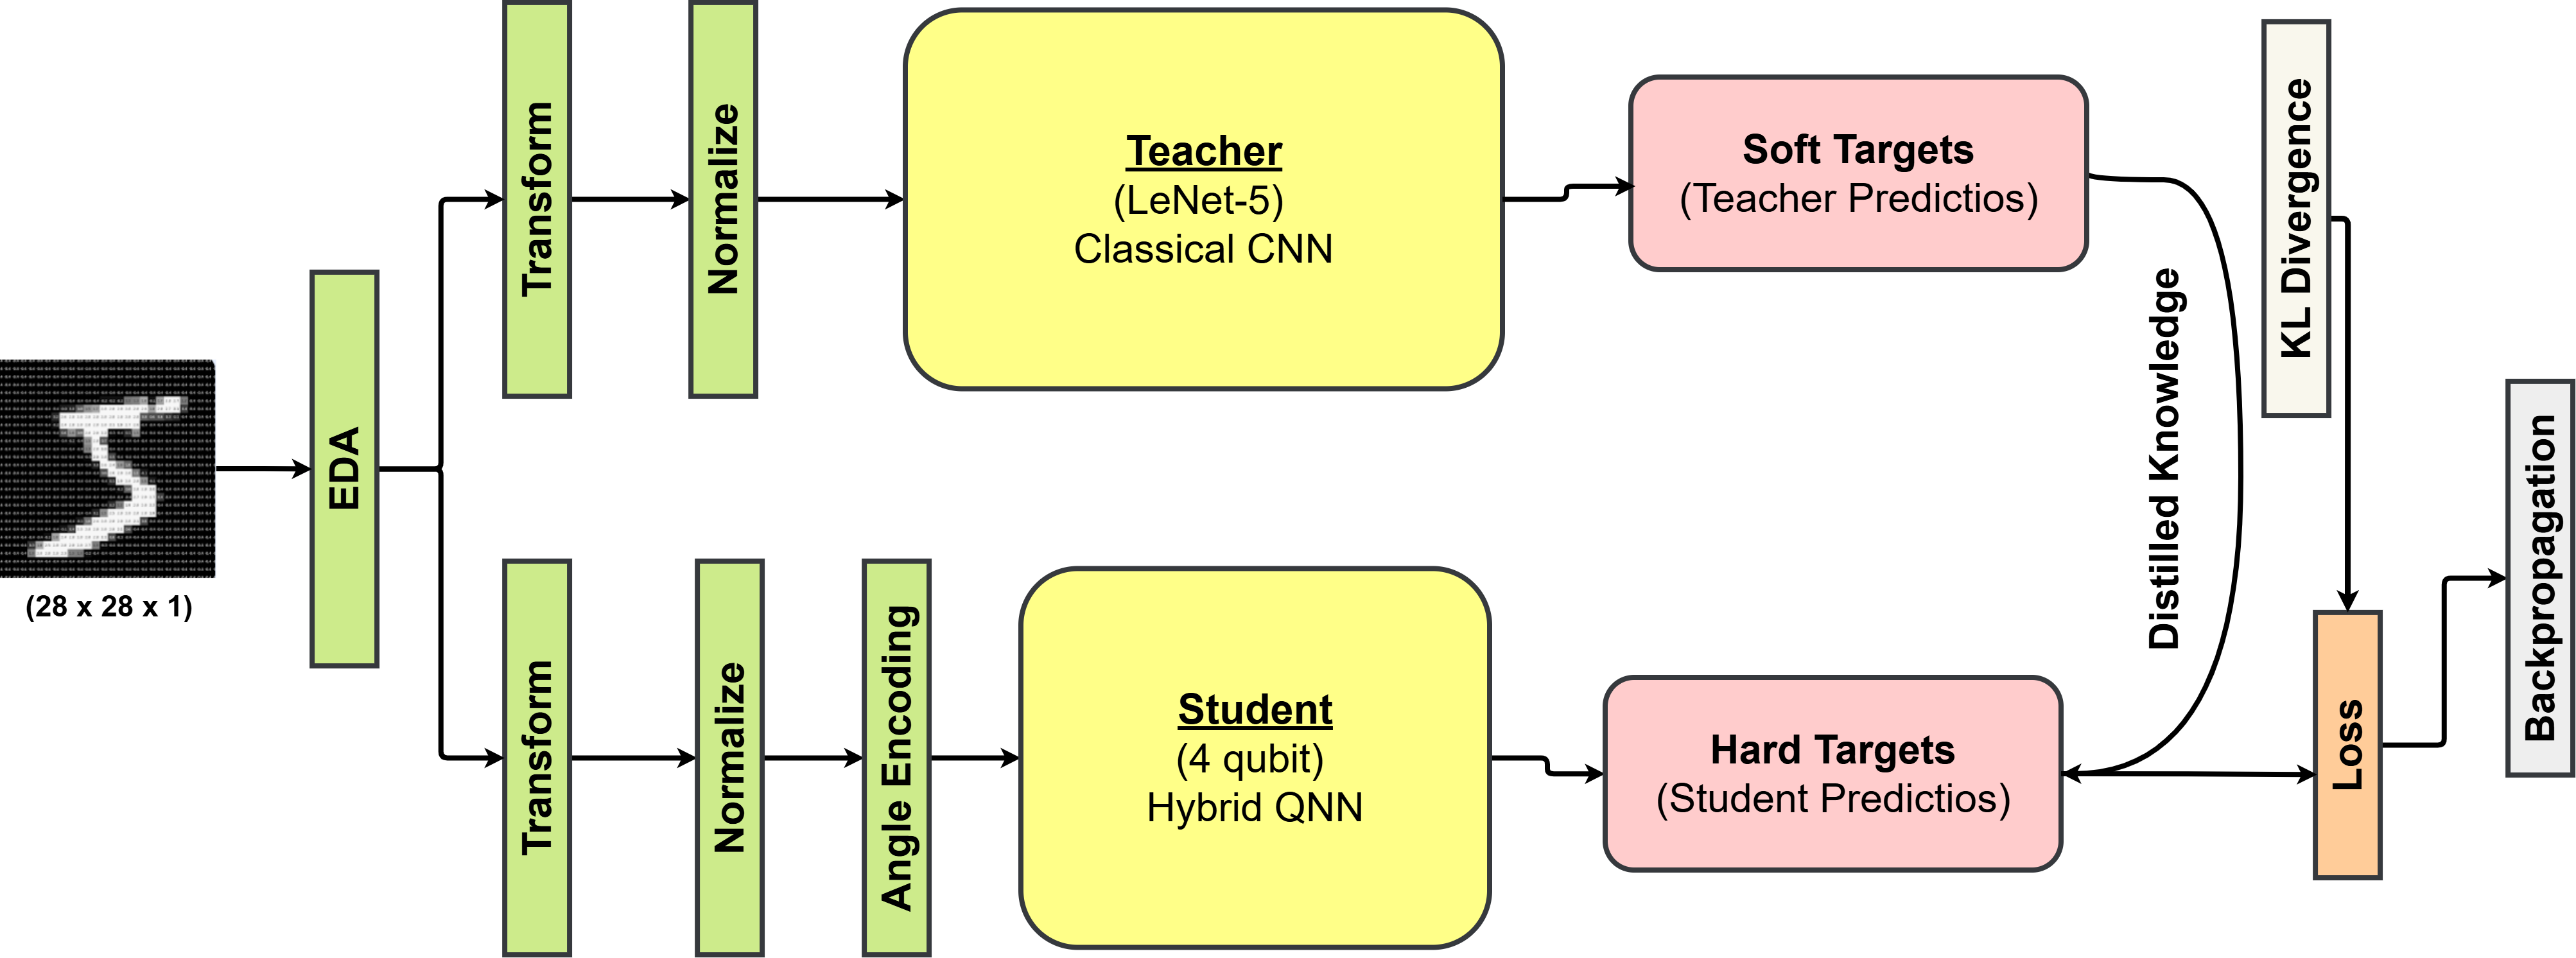

# **Result:**

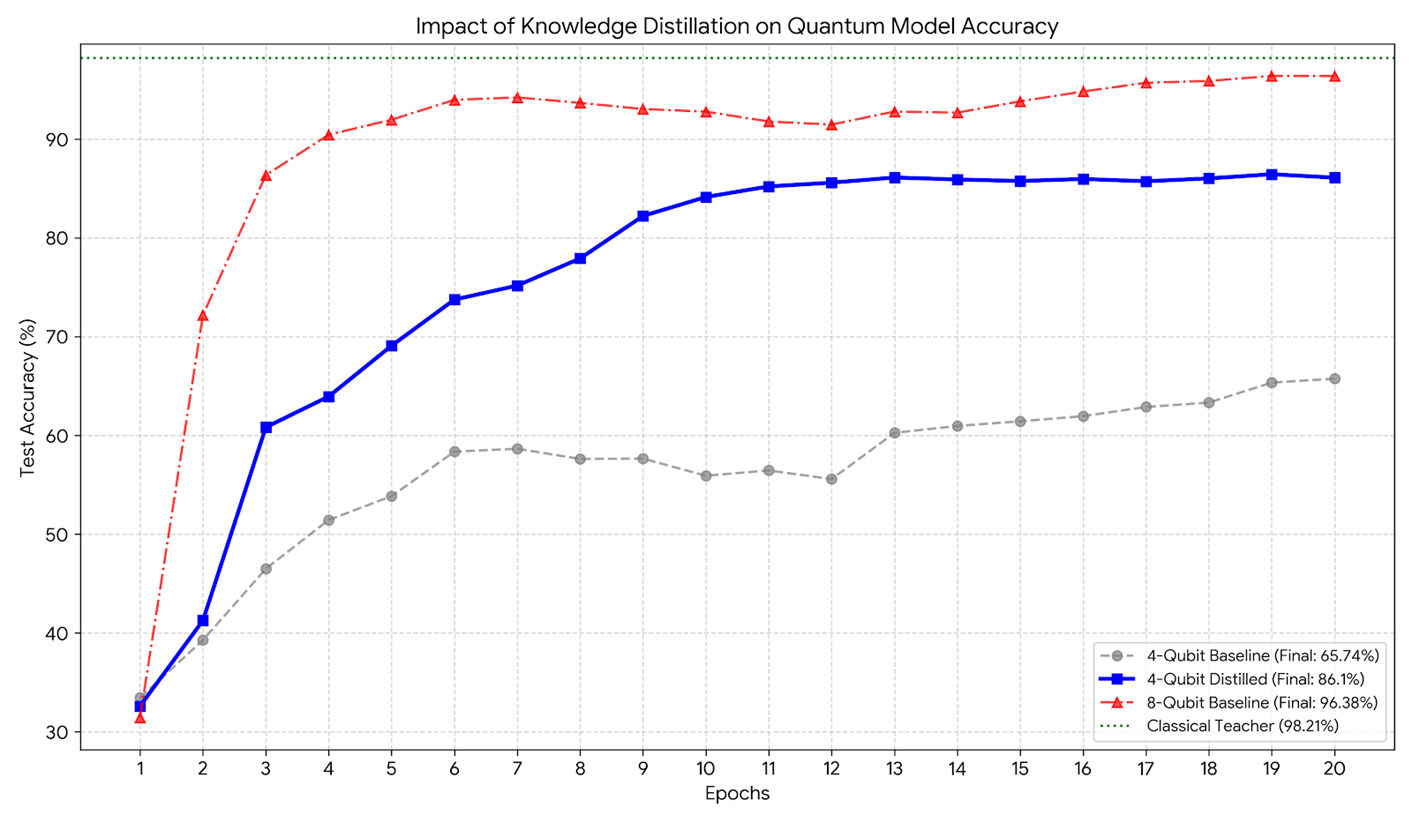

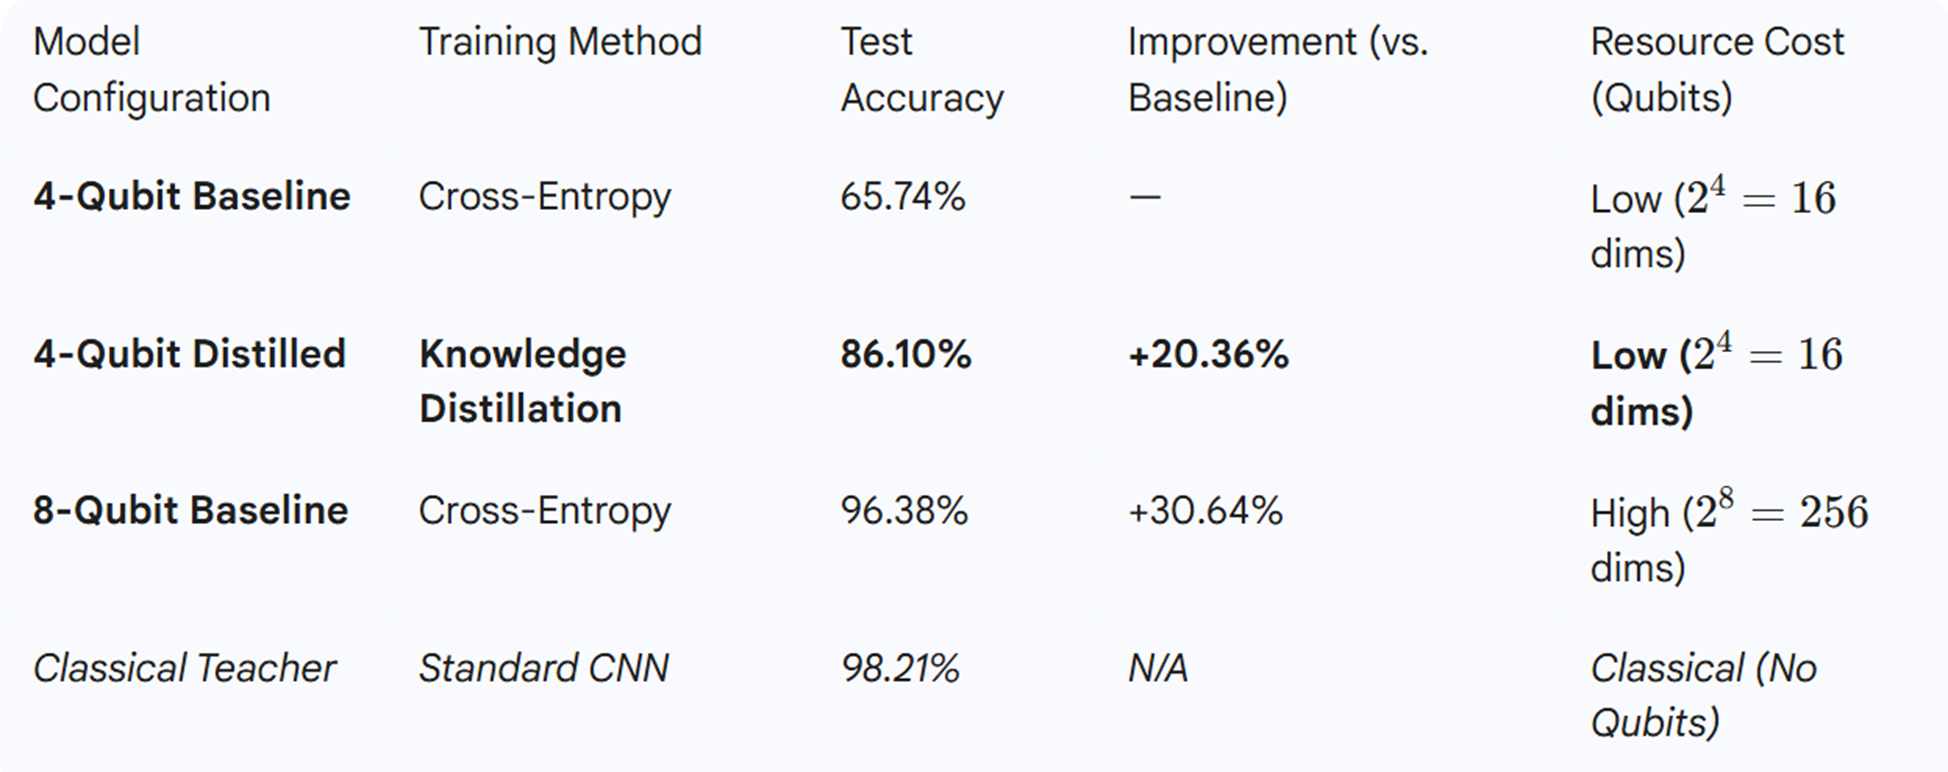

# **Experiment:**

In [ ]:
!pip install torchquantum qiskit qiskit-ibm-runtime qiskit-aer torchvision tqdm matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of qiskit-ibm-runtime to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of qiskit-ibm-runtime to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 11.8 MB/s eta 0:00:00
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of qiskit-aer to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of qiskit-aer to determine which version is 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import torchquantum as tq
from tqdm import tqdm
import matplotlib.pyplot as plt
import sys

In [ ]:
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.allow_tf32 = True

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Running on device: {DEVICE}")

Running on device: cuda


/usr/local/lib/python3.12/dist-packages/torch/backends/__init__.py:46: UserWarning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_precision = 'ieee'. Old settings, e.g, torch.backends.cuda.matmul.allow_tf32 = True, torch.backends.cudnn.allow_tf32 = True, allowTF32CuDNN() and allowTF32CuBLAS() will be deprecated after Pytorch 2.9. Please see https://pytorch.org/docs/main/notes/cuda.html#tensorfloat-32-tf32-on-ampere-and-later-devices (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:80.)
  self.setter(val)


In [ ]:
import sys
import platform
import torch
import torchquantum as tq
import qiskit
import psutil

def print_system_report():
    print("="*60)
    print(f"{'PLATFORM CONFIGURATION REPORT':^60}")
    print("="*60)

    # --- Hardware Info ---
    print(f"\n[1] HARDWARE SPECIFICATIONS")
    print("-" * 30)

    # CPU / RAM
    print(f"Processor:       {platform.processor()}")
    print(f"OS Platform:     {platform.platform()}")
    ram_gb = psutil.virtual_memory().total / (1024 ** 3)
    print(f"System RAM:      {ram_gb:.2f} GB")

    # GPU
    if torch.cuda.is_available():
        gpu_name = torch.cuda.get_device_name(0)
        gpu_count = torch.cuda.device_count()
        capability = torch.cuda.get_device_capability(0)
        vram = torch.cuda.get_device_properties(0).total_memory / (1024**3)

        print(f"Accelerator:     {gpu_name}")
        print(f"GPU Count:       {gpu_count}")
        print(f"VRAM:            {vram:.2f} GB")
        print(f"Compute Cap:     {capability[0]}.{capability[1]}")

        if capability[0] >= 8:
            print(f"Optimization:    TensorFloat-32 (TF32) ENABLED")
        else:
            print(f"Optimization:    Standard FP32")
    else:
        print("Accelerator:     None (CPU Only - Not Recommended for QML)")

    # --- Software Info ---
    print(f"\n[2] SOFTWARE ENVIRONMENT")
    print("-" * 30)
    print(f"Python:          {sys.version.split()[0]}")
    print(f"PyTorch:         {torch.__version__}")
    print(f"TorchQuantum:    {tq.__version__ if hasattr(tq, '__version__') else 'Installed (No ver. tag)'}")
    print(f"Qiskit:          {qiskit.__version__}")

    print("="*60)

# Run the report
print_system_report()

               PLATFORM CONFIGURATION REPORT                

[1] HARDWARE SPECIFICATIONS
------------------------------
Processor:       x86_64
OS Platform:     Linux-6.6.105+-x86_64-with-glibc2.35
System RAM:      167.05 GB
Accelerator:     NVIDIA A100-SXM4-80GB
GPU Count:       1
VRAM:            79.32 GB
Compute Cap:     8.0
Optimization:    TensorFloat-32 (TF32) ENABLED

[2] SOFTWARE ENVIRONMENT
------------------------------
Python:          3.12.12
PyTorch:         2.9.0+cu126
TorchQuantum:    0.1.8
Qiskit:          0.46.3


In [ ]:
# --- Configuration ---
NUM_QUBITS = 4 #For 8 qubit experiments we use number of qubits 8
CLASSES = 10
BATCH_SIZE = 1024
EPOCHS = 20
LEARNING_RATE = 0.001
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


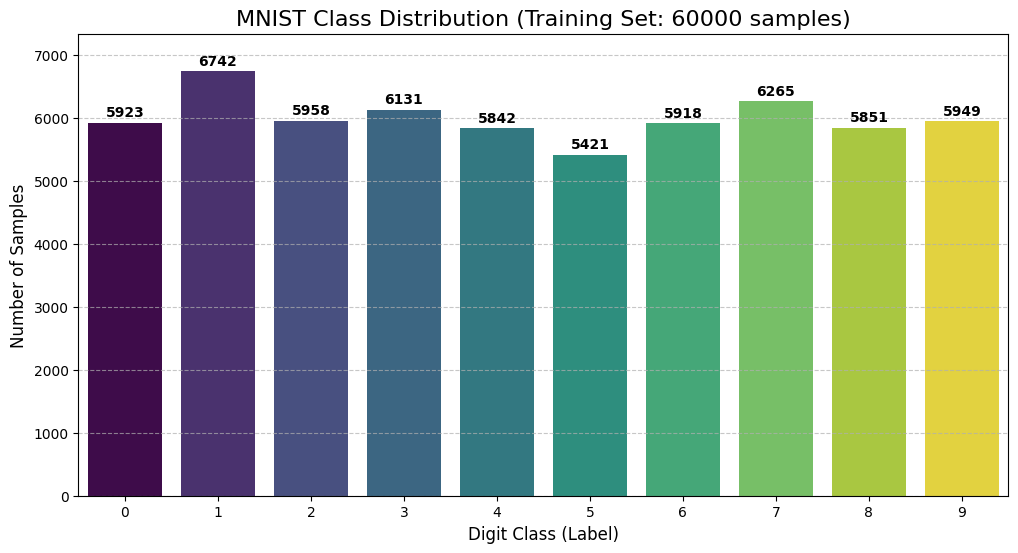

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.datasets import mnist

# 1. Load Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Count the occurrences of each digit (0-9)
unique, counts = np.unique(y_train, return_counts=True)
classes = unique
frequencies = counts

# 3. Create the Visualization
plt.figure(figsize=(12, 6))

# Create a bar plot
ax = sns.barplot(x=classes, y=frequencies, hue=classes, palette="viridis", legend=False)

# Add title and labels
plt.title(f"MNIST Class Distribution (Training Set: {len(y_train)} samples)", fontsize=16)
plt.xlabel("Digit Class (Label)", fontsize=12)
plt.ylabel("Number of Samples", fontsize=12)
plt.xticks(classes)  # Ensure all digits 0-9 are shown

# 4. Add the actual count numbers on top of the bars for clarity
for i, count in enumerate(frequencies):
    ax.text(i, count + 50, str(count), ha='center', va='bottom', fontweight='bold')

plt.ylim(0, max(frequencies) + 600)  # Add some headroom for the text
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# --- 1. Data Preparation (Full MNIST) ---
def get_data(batch_size):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])
    train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
    test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)
    return train_loader, test_loader

train_loader, test_loader = get_data(BATCH_SIZE)

### Traning Student Hybrid QNN (without Teacher) to understand the based line QNN accuracy

In [ ]:
# --- The Student Model ---
class QLayer(tq.QuantumModule):
    def __init__(self, n_qubits):
        super().__init__()
        self.n_qubits = n_qubits
        self.hadamard = tq.Hadamard()
        self.ry = tq.RY()
        self.rx = tq.RX()
        self.cnot = tq.CNOT()
        self.measure = tq.MeasureAll(tq.PauliZ)

    def forward(self, x, q_device):
        self.q_device = q_device
        self.q_device.reset_states(x.shape[0])
        for k in range(self.n_qubits):
            self.hadamard(self.q_device, wires=k)
        for k in range(self.n_qubits):
            self.ry(self.q_device, wires=k, params=x[:, k])
        for k in range(self.n_qubits):
            self.cnot(self.q_device, wires=[k, (k+1) % self.n_qubits])
        for k in range(self.n_qubits):
            self.rx(self.q_device, wires=k, params=x[:, k])
        return self.measure(self.q_device)

class StudentQNN(nn.Module):
    def __init__(self, n_qubits=4, n_classes=10):
        super(StudentQNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5)
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(16 * 12 * 12, 32)
        self.fc2 = nn.Linear(32, n_qubits)
        self.q_layer = QLayer(n_qubits)
        self.q_device = tq.QuantumDevice(n_wires=n_qubits)
        self.q_device.to(DEVICE)
        self.fc3 = nn.Linear(n_qubits, n_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x_angle = torch.pi * torch.tanh(self.fc2(x))
        exp_val = self.q_layer(x_angle, self.q_device)
        return self.fc3(exp_val)



Circuit diagram saved to 'student_circuit_architecture.png'


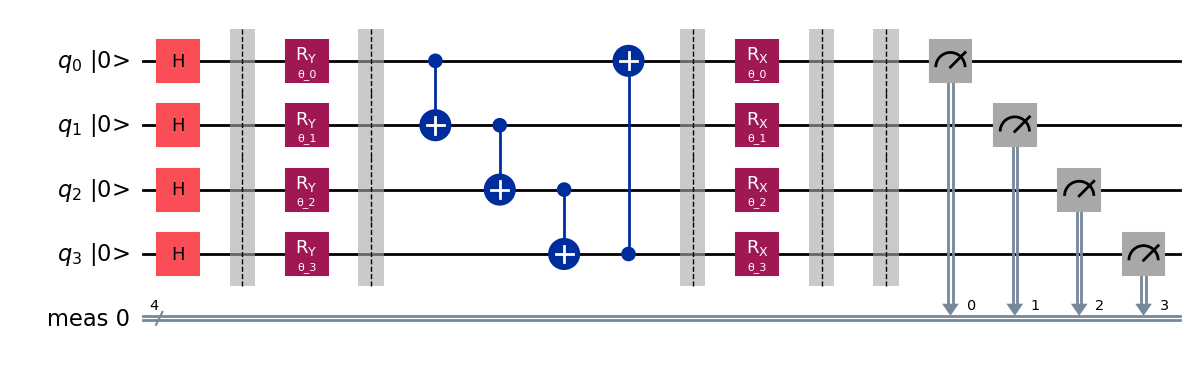

<Figure size 640x480 with 0 Axes>

In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
import matplotlib.pyplot as plt

def draw_student_circuit(n_qubits=4):
    # 1. Initialize Circuit
    qc = QuantumCircuit(n_qubits)

    # Parameters representing the input latent vector 'x' coming from the FC2 layer
    # We use 'θ' (theta) to denote variational parameters
    inputs = [Parameter(f'θ_{i}') for i in range(n_qubits)]

    # 2. Superposition (Hadamard Layer)
    # Creates the initial equal superposition state
    qc.h(range(n_qubits))
    qc.barrier()

    # 3. Feature Encoding (Ry Rotations)
    # Maps the classical data into the quantum state
    for i in range(n_qubits):
        qc.ry(inputs[i], i)
    qc.barrier()

    # 4. Strong Entanglement (CNOT Ring Topology)
    # Creates correlations between qubits: 0->1, 1->2, 2->3, 3->0
    for i in range(n_qubits):
        control = i
        target = (i + 1) % n_qubits
        qc.cx(control, target)
    qc.barrier()

    # 5. Data Re-uploading / Secondary Encoding (Rx Rotations)
    # Increases expressibility by rotating on a different axis using the same data
    for i in range(n_qubits):
        qc.rx(inputs[i], i)
    qc.barrier()

    # 6. Measurement (Pauli-Z)
    qc.measure_all()

    return qc

# --- Generate and Save ---
circuit = draw_student_circuit(n_qubits=4)

# Draw using the 'iqp' style (standard for academic papers)
fig = circuit.draw(output='mpl',
                   style='iqp',
                   scale=1.0,
                   plot_barriers=True,
                   initial_state=True)

# Save high-res for your paper
plt.savefig("student_circuit_architecture.png", dpi=300, bbox_inches='tight')
print("Circuit diagram saved to 'student_circuit_architecture.png'")

# Show
display(fig)

In [ ]:
# --- Training Loop (Standard Cross-Entropy) ---
print("\n" + "="*40)
print(f"BASELINE: Training 4-Qubit QNN (No Teacher)")
print("="*40)

model = StudentQNN(NUM_QUBITS, CLASSES).to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
loss_func = nn.CrossEntropyLoss()

history = {'loss': [], 'acc': []}

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}")
    for data, target in pbar:
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_func(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        pbar.set_postfix({'loss': loss.item()})

    # Validation
    model.eval()
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    acc = 100. * correct / len(test_loader.dataset)
    history['loss'].append(total_loss / len(train_loader))
    history['acc'].append(acc)
    print(f"Epoch {epoch+1}: Baseline Accuracy={acc:.2f}%")




BASELINE: Training 4-Qubit QNN (No Teacher)


Epoch 1: 100%|██████████| 59/59 [00:06<00:00,  9.48it/s, loss=2.09]


Epoch 1: Baseline Accuracy=33.44%


Epoch 2: 100%|██████████| 59/59 [00:06<00:00,  9.71it/s, loss=2.02]


Epoch 2: Baseline Accuracy=39.27%


Epoch 3: 100%|██████████| 59/59 [00:06<00:00,  9.21it/s, loss=1.92]


Epoch 3: Baseline Accuracy=46.49%


Epoch 4: 100%|██████████| 59/59 [00:06<00:00,  9.66it/s, loss=1.87]


Epoch 4: Baseline Accuracy=51.44%


Epoch 5: 100%|██████████| 59/59 [00:06<00:00,  9.43it/s, loss=1.8]


Epoch 5: Baseline Accuracy=53.85%


Epoch 6: 100%|██████████| 59/59 [00:06<00:00,  9.50it/s, loss=1.74]


Epoch 6: Baseline Accuracy=58.36%


Epoch 7: 100%|██████████| 59/59 [00:06<00:00,  9.42it/s, loss=1.68]


Epoch 7: Baseline Accuracy=58.65%


Epoch 8: 100%|██████████| 59/59 [00:06<00:00,  9.74it/s, loss=1.64]


Epoch 8: Baseline Accuracy=57.62%


Epoch 9: 100%|██████████| 59/59 [00:06<00:00,  9.41it/s, loss=1.6]


Epoch 9: Baseline Accuracy=57.65%


Epoch 10: 100%|██████████| 59/59 [00:06<00:00,  9.69it/s, loss=1.54]


Epoch 10: Baseline Accuracy=55.92%


Epoch 11: 100%|██████████| 59/59 [00:06<00:00,  9.52it/s, loss=1.5]


Epoch 11: Baseline Accuracy=56.45%


Epoch 12: 100%|██████████| 59/59 [00:06<00:00,  9.56it/s, loss=1.46]


Epoch 12: Baseline Accuracy=55.58%


Epoch 13: 100%|██████████| 59/59 [00:06<00:00,  9.43it/s, loss=1.44]


Epoch 13: Baseline Accuracy=60.26%


Epoch 14: 100%|██████████| 59/59 [00:06<00:00,  9.56it/s, loss=1.39]


Epoch 14: Baseline Accuracy=60.96%


Epoch 15: 100%|██████████| 59/59 [00:06<00:00,  9.50it/s, loss=1.34]


Epoch 15: Baseline Accuracy=61.43%


Epoch 16: 100%|██████████| 59/59 [00:06<00:00,  9.74it/s, loss=1.33]


Epoch 16: Baseline Accuracy=61.95%


Epoch 17: 100%|██████████| 59/59 [00:06<00:00,  9.59it/s, loss=1.29]


Epoch 17: Baseline Accuracy=62.88%


Epoch 18: 100%|██████████| 59/59 [00:05<00:00,  9.83it/s, loss=1.25]


Epoch 18: Baseline Accuracy=63.32%


Epoch 19: 100%|██████████| 59/59 [00:06<00:00,  9.77it/s, loss=1.26]


Epoch 19: Baseline Accuracy=65.35%


Epoch 20: 100%|██████████| 59/59 [00:05<00:00,  9.84it/s, loss=1.22]


Epoch 20: Baseline Accuracy=65.74%


For Number of Qubit = 4 ; The Baseline Student QNN achieved Accuracy = 65.74%

For Number of Qubit = 4 ; The Baseline Student QNN achieved Accuracy = 96.38% (2x number of qubit)

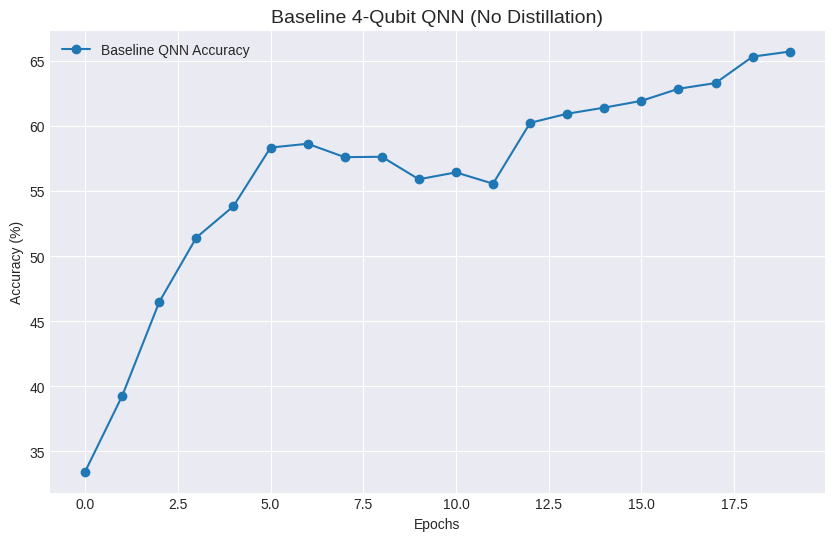

In [ ]:
# --- Plotting ---
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(10, 6))
plt.plot(history['acc'], marker='o', label='Baseline QNN Accuracy')
plt.title(f'Baseline 4-Qubit QNN (No Distillation)', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import torchquantum as tq
from tqdm import tqdm
import matplotlib.pyplot as plt
import sys

# --- A100 Optimization ---
torch.backends.cuda.matmul.allow_tf32 = True
torch.backends.cudnn.allow_tf32 = True
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Running on device: {DEVICE}")

# --- Configuration ---
NUM_QUBITS = 4           # Student Capacity
CLASSES = 10             # MNIST 0-9
BATCH_SIZE = 1024        # Large batch for A100
TEACHER_EPOCHS = 8       # LeNet converges fast
STUDENT_EPOCHS = 20      # Distillation takes time
TEMP = 4.0               # Temperature for Softmax (Softens the probability distribution)
ALPHA = 0.5              # Balance between Hard Label Loss (0.5) and Teacher Loss (0.5)



Running on device: cuda


/usr/local/lib/python3.12/dist-packages/torch/backends/__init__.py:46: UserWarning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_precision = 'ieee'. Old settings, e.g, torch.backends.cuda.matmul.allow_tf32 = True, torch.backends.cudnn.allow_tf32 = True, allowTF32CuDNN() and allowTF32CuBLAS() will be deprecated after Pytorch 2.9. Please see https://pytorch.org/docs/main/notes/cuda.html#tensorfloat-32-tf32-on-ampere-and-later-devices (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:80.)
  self.setter(val)


In [ ]:
# --- 1. Data Preparation (Full MNIST 0-9) ---
def get_data(batch_size):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    # Full MNIST
    train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    # We use all data for best teacher performance
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
    test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)

    return train_loader, test_loader

train_loader, test_loader = get_data(BATCH_SIZE)

100%|██████████| 9.91M/9.91M [00:01<00:00, 5.55MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 129kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.24MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 9.32MB/s]


## --- 2. The Teacher: Classical LeNet-5 ---

In [ ]:
# --- 2. The Teacher: Classical LeNet-5 ---
class LeNet5(nn.Module):
    def __init__(self, n_classes=10):
        super(LeNet5, self).__init__()
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5),
            nn.Tanh(),
            nn.AvgPool2d(2),
            nn.Conv2d(6, 16, kernel_size=5),
            nn.Tanh(),
            nn.AvgPool2d(2),
            nn.Conv2d(16, 120, kernel_size=4),
            nn.Tanh()
        )
        self.classifier = nn.Sequential(
            nn.Linear(120, 84),
            nn.Tanh(),
            nn.Linear(84, n_classes),
        )

    def forward(self, x):
        x = self.feature_extractor(x)
        x = x.flatten(1)
        return self.classifier(x)

## --- 3. The Student: 4-Qubit Hybrid QNN ---

In [ ]:
# --- 3. The Student: 4-Qubit Hybrid QNN ---
class QLayer(tq.QuantumModule):
    def __init__(self, n_qubits):
        super().__init__()
        self.n_qubits = n_qubits
        self.hadamard = tq.Hadamard()
        self.ry = tq.RY()
        self.rx = tq.RX()
        self.cnot = tq.CNOT()
        self.measure = tq.MeasureAll(tq.PauliZ)

    def forward(self, x, q_device):
        self.q_device = q_device
        self.q_device.reset_states(x.shape[0])

        # Superposition
        for k in range(self.n_qubits):
            self.hadamard(self.q_device, wires=k)

        # Encoding
        for k in range(self.n_qubits):
            self.ry(self.q_device, wires=k, params=x[:, k])

        # Entanglement Ring
        for k in range(self.n_qubits):
            self.cnot(self.q_device, wires=[k, (k+1) % self.n_qubits])

        # Re-uploading / Rx
        for k in range(self.n_qubits):
            self.rx(self.q_device, wires=k, params=x[:, k])

        return self.measure(self.q_device)

class StudentQNN(nn.Module):
    def __init__(self, n_qubits=4, n_classes=10):
        super(StudentQNN, self).__init__()
        # Classical Downsampler (similar to your previous code)
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5)
        self.pool = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(16 * 12 * 12, 32)
        self.fc2 = nn.Linear(32, n_qubits) # Latent space for qubits

        # Quantum Part
        self.q_layer = QLayer(n_qubits)
        self.q_device = tq.QuantumDevice(n_wires=n_qubits)
        self.q_device.to(DEVICE)

        # Classifier Head
        self.fc3 = nn.Linear(n_qubits, n_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))

        # To Quantum
        x_angle = torch.pi * torch.tanh(self.fc2(x))
        exp_val = self.q_layer(x_angle, self.q_device)

        # Final Classify
        x = self.fc3(exp_val)
        return x # Return Logits (Softmax applied in loss)

## --- 4. Distillation Loss Function ---

In [ ]:
# --- 4. Distillation Loss Function ---
def distillation_loss(student_logits, teacher_logits, labels, T, alpha):
    # 1. Hard Loss (Student vs True Labels)
    hard_loss = F.cross_entropy(student_logits, labels)

    # 2. Soft Loss (Student vs Teacher Probability Distributions)
    # KL Divergence expects LogSoftmax from student and Softmax from teacher
    distillation_loss = nn.KLDivLoss(reduction="batchmean")(
        F.log_softmax(student_logits / T, dim=1),
        F.softmax(teacher_logits / T, dim=1)
    ) * (T * T)

    # Combine
    return alpha * hard_loss + (1 - alpha) * distillation_loss

## --- 5. Phase 1: Train Teacher ---

In [ ]:
# --- 5. Phase 1: Train Teacher ---
print("\n" + "="*40)
print(f"PHASE 1: Training Classical Teacher (LeNet-5)")
print("="*40)

teacher = LeNet5(CLASSES).to(DEVICE)
t_opt = optim.Adam(teacher.parameters(), lr=0.001)

for epoch in range(TEACHER_EPOCHS):
    teacher.train()
    for data, target in tqdm(train_loader, desc=f"Teacher Epoch {epoch+1}"):
        data, target = data.to(DEVICE), target.to(DEVICE)
        t_opt.zero_grad()
        output = teacher(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        t_opt.step()

# Validate Teacher
teacher.eval()
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(DEVICE), target.to(DEVICE)
        output = teacher(data)
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
print(f"Teacher Accuracy: {100. * correct / len(test_loader.dataset):.2f}%")
print("Teacher is frozen for distillation.\n")


PHASE 1: Training Classical Teacher (LeNet-5)


Teacher Epoch 8: 100%|██████████| 59/59 [00:06<00:00,  9.66it/s]


Teacher Accuracy: 98.38%
Teacher is frozen for distillation.



## --- 6. Phase 2: Distill to Student ---

In [ ]:
# --- 6. Phase 2: Distill to Student ---
print("="*40)
print(f"PHASE 2: Distilling to 4-Qubit Student (T={TEMP}, Alpha={ALPHA})")
print("="*40)

student = StudentQNN(NUM_QUBITS, CLASSES).to(DEVICE)
s_opt = optim.Adam(student.parameters(), lr=0.001)

history = {'loss': [], 'acc': []}

for epoch in range(STUDENT_EPOCHS):
    student.train()
    teacher.eval() # Teacher must be in eval mode
    total_loss = 0

    pbar = tqdm(train_loader, desc=f"Distill Epoch {epoch+1}")
    for data, target in pbar:
        data, target = data.to(DEVICE), target.to(DEVICE)

        s_opt.zero_grad()

        # 1. Get Student Output
        student_logits = student(data)

        # 2. Get Teacher Output (No Grad)
        with torch.no_grad():
            teacher_logits = teacher(data)

        # 3. Calculate Distillation Loss
        loss = distillation_loss(student_logits, teacher_logits, target, TEMP, ALPHA)

        loss.backward()
        s_opt.step()

        total_loss += loss.item()
        pbar.set_postfix({'KD Loss': loss.item()})

    # Validation
    student.eval()
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = student(data)
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    acc = 100. * correct / len(test_loader.dataset)
    history['loss'].append(total_loss / len(train_loader))
    history['acc'].append(acc)

    print(f"Epoch {epoch+1} Results: Loss={history['loss'][-1]:.4f}, Student Accuracy={acc:.2f}%")

PHASE 2: Distilling to 4-Qubit Student (T=4.0, Alpha=0.5)


Distill Epoch 1: 100%|██████████| 59/59 [00:06<00:00,  8.65it/s, KD Loss=5.48]


Epoch 1 Results: Loss=5.6274, Student Accuracy=32.60%


Distill Epoch 2: 100%|██████████| 59/59 [00:06<00:00,  8.82it/s, KD Loss=5.34]


Epoch 2 Results: Loss=5.3965, Student Accuracy=41.26%


Distill Epoch 3: 100%|██████████| 59/59 [00:06<00:00,  8.67it/s, KD Loss=5.23]


Epoch 3 Results: Loss=5.2592, Student Accuracy=60.82%


Distill Epoch 4: 100%|██████████| 59/59 [00:06<00:00,  8.77it/s, KD Loss=5.04]


Epoch 4 Results: Loss=5.1433, Student Accuracy=63.94%


Distill Epoch 5: 100%|██████████| 59/59 [00:06<00:00,  8.88it/s, KD Loss=5.02]


Epoch 5 Results: Loss=5.0386, Student Accuracy=69.08%


Distill Epoch 6: 100%|██████████| 59/59 [00:06<00:00,  8.94it/s, KD Loss=4.9]


Epoch 6 Results: Loss=4.9377, Student Accuracy=73.75%


Distill Epoch 7: 100%|██████████| 59/59 [00:06<00:00,  8.61it/s, KD Loss=4.83]


Epoch 7 Results: Loss=4.8418, Student Accuracy=75.17%


Distill Epoch 8: 100%|██████████| 59/59 [00:06<00:00,  8.67it/s, KD Loss=4.75]


Epoch 8 Results: Loss=4.7510, Student Accuracy=77.92%


Distill Epoch 9: 100%|██████████| 59/59 [00:06<00:00,  8.98it/s, KD Loss=4.57]


Epoch 9 Results: Loss=4.6572, Student Accuracy=82.22%


Distill Epoch 10: 100%|██████████| 59/59 [00:06<00:00,  8.73it/s, KD Loss=4.55]


Epoch 10 Results: Loss=4.5631, Student Accuracy=84.14%


Distill Epoch 11: 100%|██████████| 59/59 [00:06<00:00,  8.84it/s, KD Loss=4.44]


Epoch 11 Results: Loss=4.4648, Student Accuracy=85.21%


Distill Epoch 12: 100%|██████████| 59/59 [00:06<00:00,  8.83it/s, KD Loss=4.34]


Epoch 12 Results: Loss=4.3651, Student Accuracy=85.59%


Distill Epoch 13: 100%|██████████| 59/59 [00:06<00:00,  8.58it/s, KD Loss=4.2]


Epoch 13 Results: Loss=4.2719, Student Accuracy=86.11%


Distill Epoch 14: 100%|██████████| 59/59 [00:06<00:00,  8.69it/s, KD Loss=4.14]


Epoch 14 Results: Loss=4.1836, Student Accuracy=85.91%


Distill Epoch 15: 100%|██████████| 59/59 [00:06<00:00,  8.62it/s, KD Loss=4.06]


Epoch 15 Results: Loss=4.0971, Student Accuracy=85.76%


Distill Epoch 16: 100%|██████████| 59/59 [00:06<00:00,  8.83it/s, KD Loss=3.95]


Epoch 16 Results: Loss=4.0147, Student Accuracy=85.96%


Distill Epoch 17: 100%|██████████| 59/59 [00:06<00:00,  8.59it/s, KD Loss=3.84]


Epoch 17 Results: Loss=3.9359, Student Accuracy=85.73%


Distill Epoch 18: 100%|██████████| 59/59 [00:06<00:00,  8.90it/s, KD Loss=3.86]


Epoch 18 Results: Loss=3.8611, Student Accuracy=86.02%


Distill Epoch 19: 100%|██████████| 59/59 [00:06<00:00,  8.91it/s, KD Loss=3.8]


Epoch 19 Results: Loss=3.7900, Student Accuracy=86.44%


Distill Epoch 20: 100%|██████████| 59/59 [00:06<00:00,  8.64it/s, KD Loss=3.65]


Epoch 20 Results: Loss=3.7194, Student Accuracy=86.10%


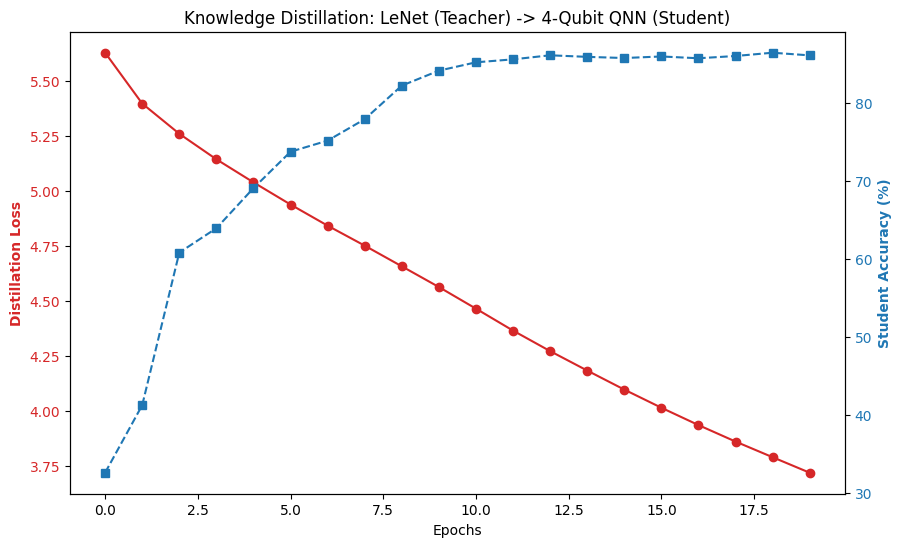

In [ ]:
# --- 7. Plotting ---
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Distillation Loss', color=color, fontweight='bold')
ax1.plot(history['loss'], color=color, marker='o', label='Loss')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Student Accuracy (%)', color=color, fontweight='bold')
ax2.plot(history['acc'], color=color, marker='s', linestyle='--', label='Accuracy')
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Knowledge Distillation: LeNet (Teacher) -> 4-Qubit QNN (Student)")
plt.show()